# Step 1: Load the data

In [ ]:
import pandas as pd


data = pd.read_csv('/content/Iris.csv')



Number of data points (rows): 150
Column names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
Data types for each column:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

After dropping duplicates, new number of data points (rows): 150


# Step 2: Examine the data

In [ ]:

# Number of data points (rows)
num_data_points = data.shape[0]

# Column names
column_names = data.columns.tolist()

# Data types for each column
data_types = data.dtypes

# Display the results
print("Number of data points (rows):", num_data_points)
print("Column names:", column_names)
print("Data types for each column:")
print(data_types)




# Step 3: Data cleaning (if necessary)

In [ ]:

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values:")
print(missing_values)


# Drop duplicates if any

In [ ]:

data.drop_duplicates(inplace=True)
print("\nAfter dropping duplicates, new number of data points (rows):", data.shape[0])

# Examine species names

In [ ]:

print("Original species names:")
print(data['Species'].unique())




Original species names:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Updated species names:
['setosa' 'versicolor' 'virginica']


# Remove 'Iris-' from species names

In [ ]:

data['Species'] = data['Species'].str.replace('Iris-', '')



# Display the updated species names

In [ ]:

print("\nUpdated species names:")
print(data['Species'].unique())

In [ ]:
# Step 1: Number of each species present
species_counts = data['Species'].value_counts()
print("Number of each species present:")
print(species_counts)

# Step 2: Mean, median, quantiles, and ranges for each petal and sepal measurement
summary_statistics = data.describe()
print("\nSummary statistics for each measurement:")
print(summary_statistics.loc[['mean', '50%', 'min', 'max']])


Number of each species present:
setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

Summary statistics for each measurement:
         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
mean   75.5       5.843333         3.054       3.758667      1.198667
50%    75.5       5.800000         3.000       4.350000      1.300000
min     1.0       4.300000         2.000       1.000000      0.100000
max   150.0       7.900000         4.400       6.900000      2.500000


In [ ]:
# Step 1: Group the data by species
species_groups = data.groupby('Species')

# Step 2: Calculate the mean and median for each species
species_means = species_groups.mean()
species_medians = species_groups.median()

# Display the results
print("Mean of each measurement for each species:")
print(species_means)

print("\nMedian of each measurement for each species:")
print(species_medians)


Mean of each measurement for each species:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                    
setosa       25.5          5.006         3.418          1.464         0.244
versicolor   75.5          5.936         2.770          4.260         1.326
virginica   125.5          6.588         2.974          5.552         2.026

Median of each measurement for each species:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                    
setosa       25.5            5.0           3.4           1.50           0.2
versicolor   75.5            5.9           2.8           4.35           1.3
virginica   125.5            6.5           3.0           5.55           2.0


# Scatter plot of sepal_length vs sepal_width

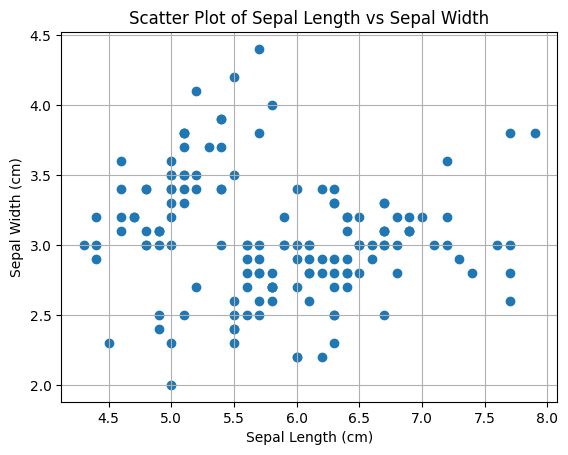

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.grid(True)  # Add grid for better visualization
plt.show()


# Create a histogram of petal_length

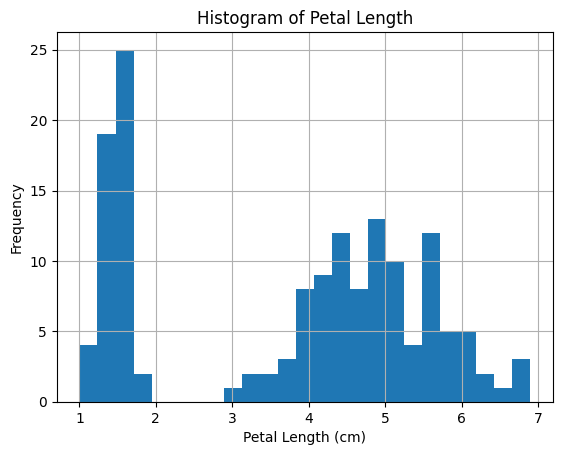

In [ ]:
import matplotlib.pyplot as plt


plt.hist(data['PetalLengthCm'], bins=25)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.grid(True)  # Add grid for better visualization
plt.show()



# Create histograms for all features overlayed

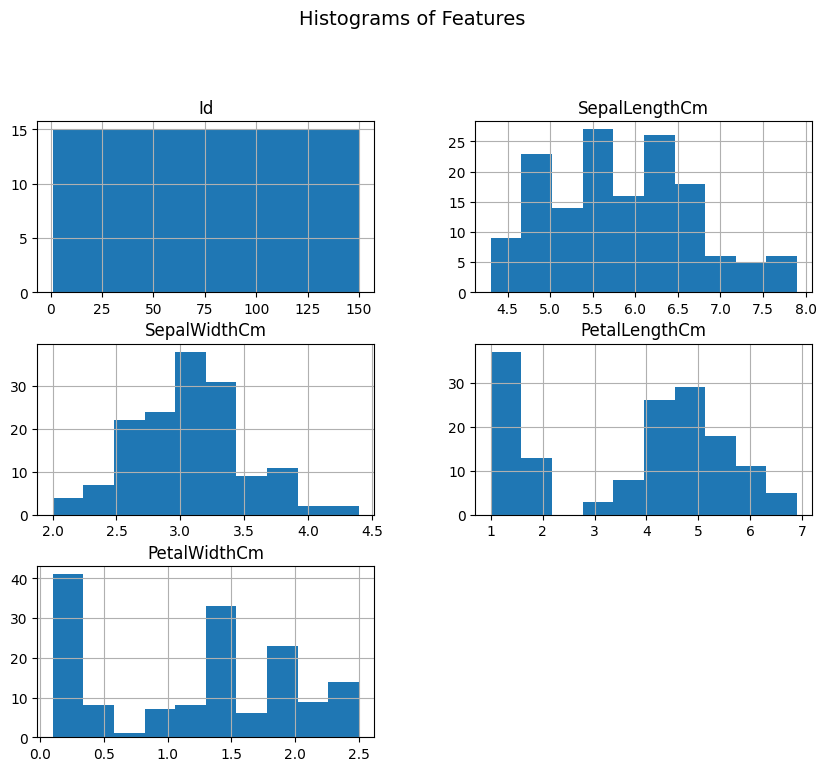

In [ ]:
import matplotlib.pyplot as plt

data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features', x=0.5, y=1.02, fontsize=14)
plt.show()


# Create boxplots for each measurement

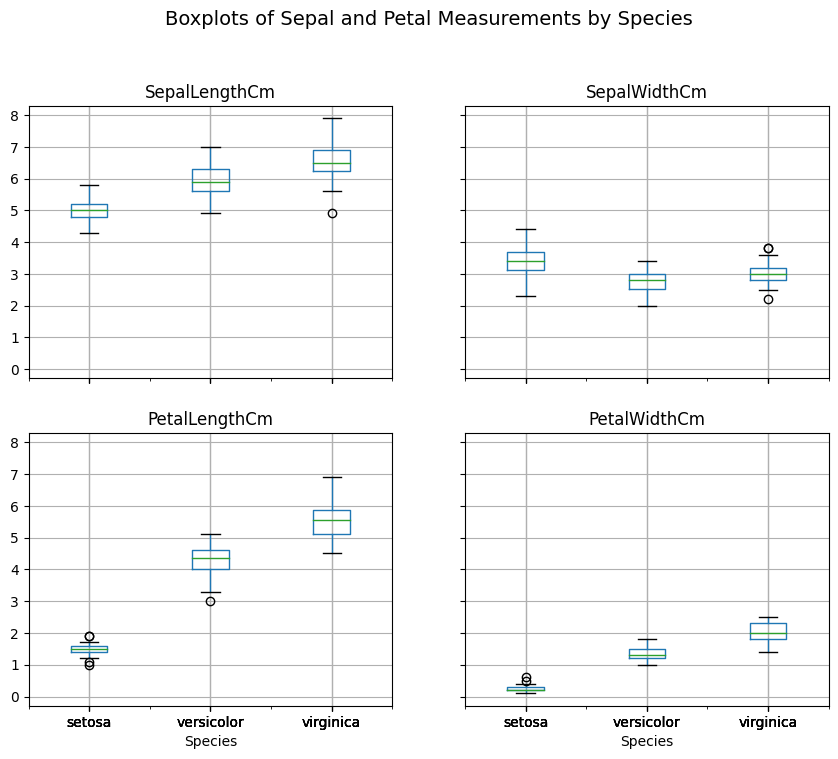

In [ ]:

data.boxplot(column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], by='Species', figsize=(10, 8))
plt.suptitle('Boxplots of Sepal and Petal Measurements by Species', x=0.5, y=1.02, fontsize=14)
plt.show()


# Create the boxplot

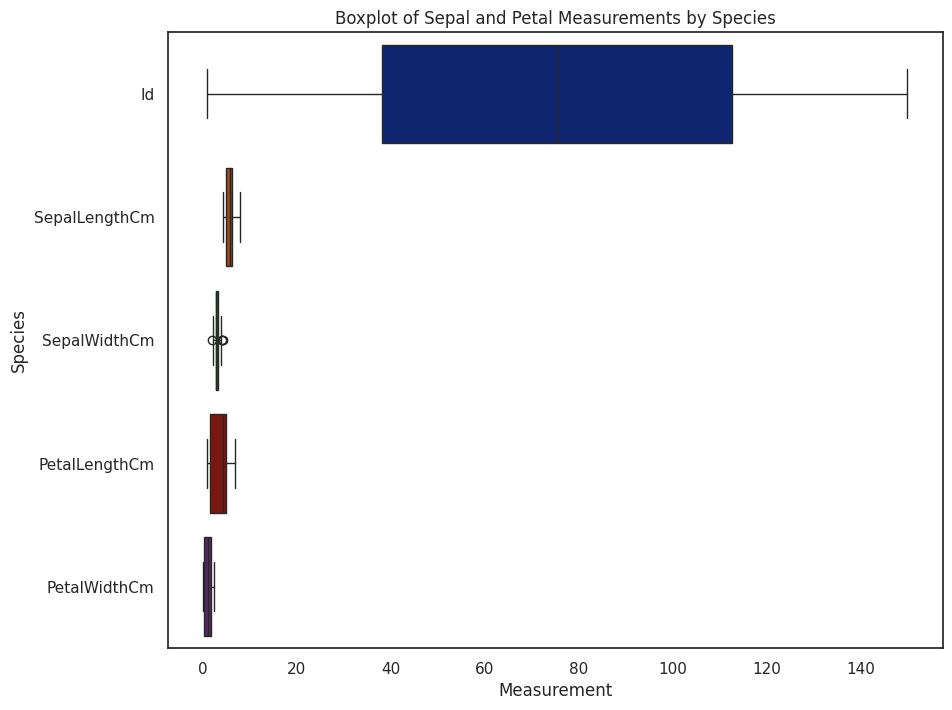

In [ ]:
import seaborn as sns

# Set seaborn style, context, and palette
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')


plt.figure(figsize=(10, 8))
sns.boxplot(data=data, orient='h', palette='dark')
plt.title('Boxplot of Sepal and Petal Measurements by Species')
plt.xlabel('Measurement')
plt.ylabel('Species')
plt.show()


# Create the pairplot

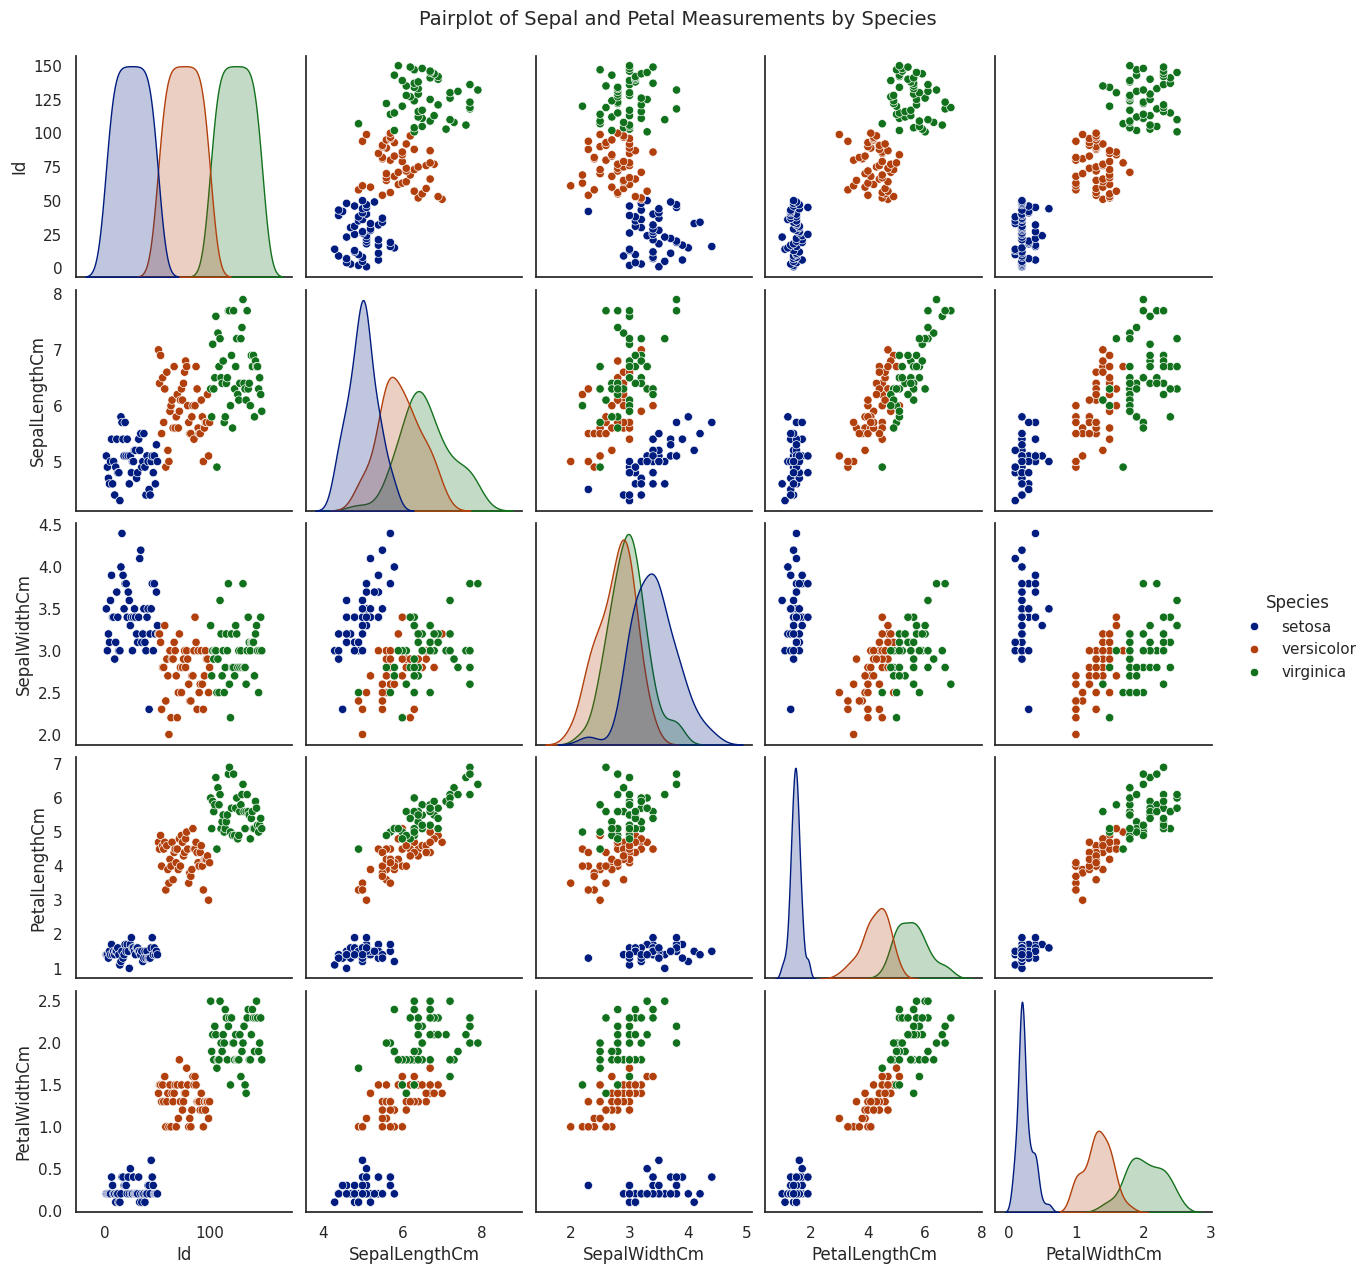

In [ ]:
import seaborn as sns

# Set seaborn style and context
sns.set_style('white')
sns.set_context('notebook')


sns.pairplot(data, hue='Species', palette='dark')
plt.suptitle('Pairplot of Sepal and Petal Measurements by Species', x=0.5, y=1.02, fontsize=14)
plt.show()
